### Problema 7.24
O escoamento horizontal confinado pelas paredes é definido pela função corrente c = 34r 4>3 sen 14 3 u24 m2>s, onde r está em metros.  Determine a intensidade da velocidade no ponto  r = 2 m, u = 45º. O escoamento é rotacional ou irrotacional? A equação de Bernoulli pode ser usada para determinar a diferença na pressão entre os  dois pontos A e B? 

Hibbeler, R. C.. Mecânica dos fluidos (p. 360). Edição do Kindle. 

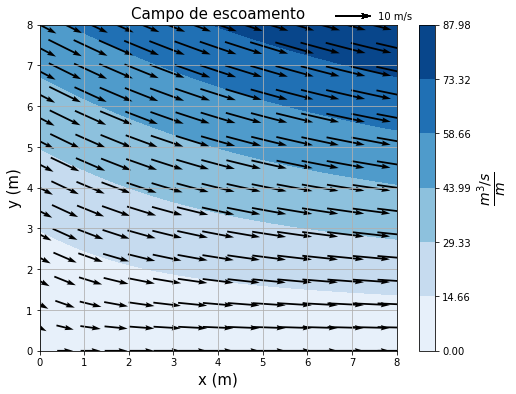

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Domínio de coordenadas
xmin=0.0000000001
xmax=8
ymin=0.0000000001
ymax=8


#Função para ciação de malha
#====================================================
def malha(xmin, xmax, ymin, ymax, nx, ny):
    x = np.linspace(xmin, xmax, nx)    #Coordenadas x dos pontos da malha
    y = np.linspace(ymin, ymax, ny)    #Coordenadas y dos pontos da malha
    X, Y = np.meshgrid(x, y)           #Criação da malha
    return X, Y

def func_corr(corrente):
    for i in range(np.shape(corrente)[0]):
        for j in range(np.shape(corrente)[1]):
            if corrente[i,j]<0:
                corrente[i,j]=0
            else:
                corrente[i,j]=corrente[i,j]
    return corrente

def func_vel(vel, fcorrente):
    for i in range(np.shape(fcorrente)[0]):
        for j in range(np.shape(fcorrente)[1]):
            if fcorrente[i,j]<0:
                vel[i,j]=0
                vel[i,j]=0
            else:
                vel[i,j]=vel[i,j]
                vel[i,j]=vel[i,j]
    return vel

#Plotagem do mapa de cores da função de corrente
#====================================================
X, Y = malha(xmin, xmax, ymin, ymax, 100, 100)

theta=np.arctan(Y/X)
r=np.sqrt(X**2+Y**2)

corrente=func_corr(4*r**(4/3)*np.sin((4/3)*theta))       #Função de corrente

fig = plt.figure(figsize=(8, 6))   #Tamanho da figura
ax = fig.add_subplot(111)          #Apenas uma figura
im = ax.contourf(X, Y,             #Plotagem da função de corrente
    corrente, cmap='Blues', levels=np.linspace(corrente.min(), corrente.max(), 7)) 
cbar=fig.colorbar(im)                   #Barra de cores
cbar.set_label(                    #Rótulo da barra de cores
    label=r'$\frac{m^{3}/s}{m}$', size=20)


#Plotagem de vetores velocidade
#====================================================
X, Y = malha(xmin, xmax, ymin, ymax, 15, 15)
theta=np.arctan(Y/X)
r=np.sqrt(X**2+Y**2)



v_r=(16/3)*r**(1/3)*np.cos((4/3)*theta)                            #Componente x da velocidade
v_theta=-(16/3)*r**(1/3)*np.sin((4/3)*theta)                           #Componente y da velocidade
VR=(v_r**2+v_theta**2)**0.5
U=func_vel(v_r*np.cos(theta)-v_theta*np.sin(theta), 4*r**(4/3)*np.sin((4/3)*theta))
V=func_vel(v_r*np.sin(theta)+v_theta*np.cos(theta), 4*r**(4/3)*np.sin((4/3)*theta))


velocidade=ax.quiver(X, Y,       #Plotagem do vetor velocidade
    U, V, color='k', angles='xy', scale=100, width=0.005, pivot='mid')
qk=ax.quiverkey(velocidade, 0.7, 0.9, 10, label='10 m/s', labelpos='E', coordinates='figure')

#Linha de corrente
#====================================================
#theta=np.linspace(0,np.pi/4,100)
#r=(8*np.sqrt(3)/np.sin(4*theta))**(1/4)
#x=r*np.cos(theta)
#y=r*np.sin(theta)
#plt.plot(x,y, color='r', linewidth=2.5)

#Edição do gráfico
#====================================================
plt.title('Campo de escoamento', fontsize=15)
plt.xlabel('x (m)', fontsize=15)
plt.ylabel('y (m)', fontsize=15)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.grid()
